In [1]:
import numpy as np
import pandas as pd

# 통계학습을 위한 패키지입니다
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 기계학습을 위한 패키지입니다.
import sklearn.linear_model
from sklearn.model_selection import train_test_split

# 시각화를 위한 패키지입니다
from matplotlib import pyplot as plt
import seaborn as sns

# 그래프를 실제로 그리기 위한 설정입니다
%matplotlib inline

# 경고 메시지를 무시합니다
import warnings
warnings.filterwarnings('ignore')

In [5]:
df= pd.read_csv("./kc_house_data.csv")

#index가 1로 시작하도록 수정
df.index += 1
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21609,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21610,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21611,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21612,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
# 1. 결측치 확인
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
# 2. 각 column의 data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 1 to 21613
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
# 3. 기본적인 기술통계값 확인 - .describe() 통계값 + 중간값, 결측치, 왜도, 첨도
df_stats = df.describe().T

median_results = []
skew_results = []
kurtosis_results=[]
null_results = []

for idx, val in enumerate(df_stats.index):  #df_stats의 인덱스를 value로 취급해 index 부여
    median_results.append(df[val].median()) # 피처별 중간값
    skew_results.append(df[val].skew())     # 피처별 왜도
    kurtosis_results.append(df[val].kurtosis())  # 피처별 첨도
    null_results.append(df[val].isnull().sum())  # 피처별 결측치

df_stats['median']=median_results
df_stats['skewness']=skew_results
df_stats['kurtosis']=kurtosis_results
df_stats['missing']=null_results
df_stats

,count,mean,std,min,25%,50%,75%,max,median,skewness,kurtosis,missing
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09,3.904930e+09,0.243329,-1.260542,0
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06,4.500000e+05,4.024069,34.585540,0
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01,3.000000e+00,1.974300,49.063653,0
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00,2.250000e+00,0.511108,1.279902,0
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04,1.910000e+03,1.471555,5.243093,0
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06,7.618000e+03,13.060019,285.077820,0
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00,1.500000e+00,0.616177,-0.484723,0
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,11.385108,127.632494,0
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,3.395750,10.893022,0
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,3.000000e+00,1.032805,0.525764,0


<AxesSubplot:>

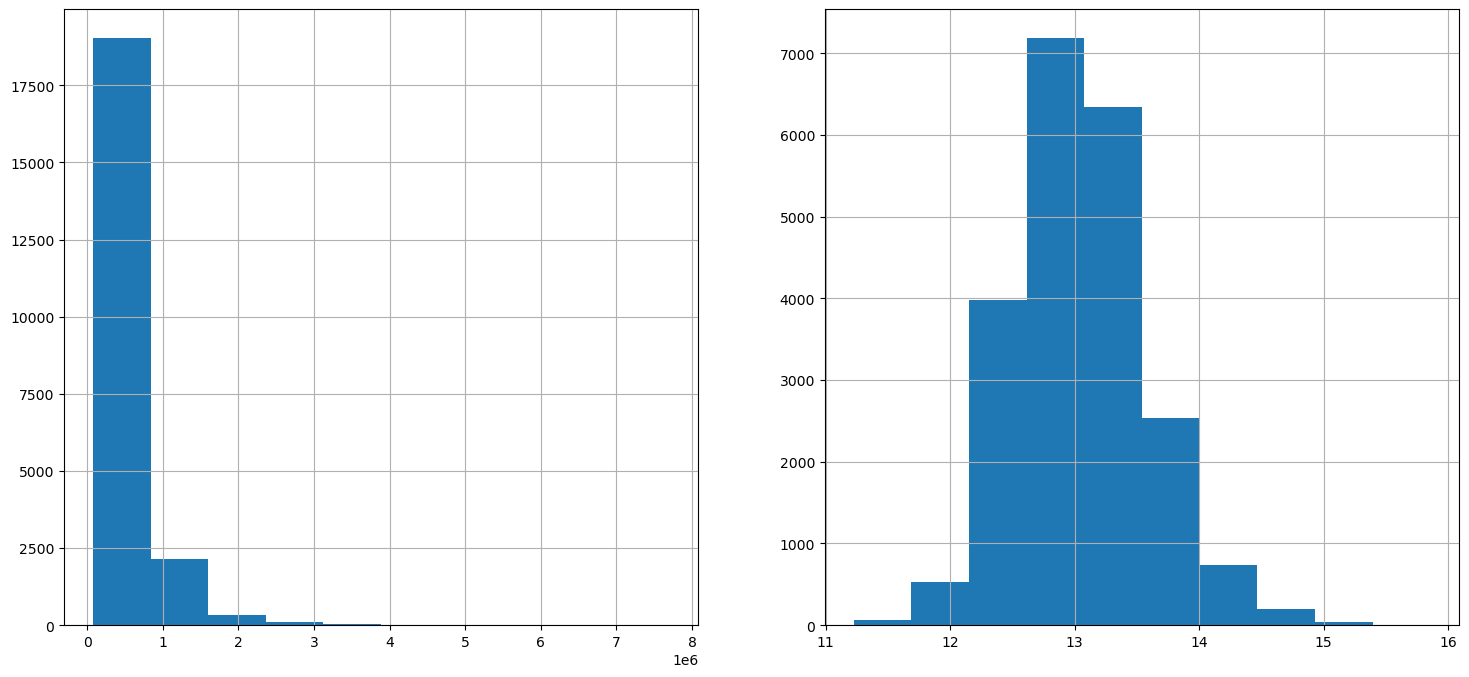

In [15]:
# 종속변수 price의 왜도가 4.02로, 왼쪽으로 치우쳐 있는 것을 자연로그화로 분포 조정
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
df['price'].hist(ax=ax[0])
np.log(df['price']).hist(ax=ax[1])

In [20]:
def separate_dtype(DataFrame:df):
    df_obj = df.select_dtypes(include=['object'])
    df_numr = df.select_dtypes(include=['int64', 'float64'])
    return [df_obj, df_numr]

(df_obj, df_numr) = separate_dtype(df)

In [21]:
df_numr.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
